In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Football Player TransferMarket Dataset\Football Players Data_2.csv')

# 1. Basic information about data

In [3]:
#Cheking dataset

#df.shape
#pd.set_option('display.max.columns', 22)
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
# Basic information
df.info()

# Describe the data
df.describe()

# Shape of data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10780 non-null  object 
 1   team                 10780 non-null  object 
 2   name                 10780 non-null  object 
 3   position             10780 non-null  object 
 4   height               10780 non-null  float64
 5   age                  10780 non-null  float64
 6   appearance           10780 non-null  int64  
 7   goals                10780 non-null  float64
 8   assists              10780 non-null  float64
 9   yellow cards         10780 non-null  float64
 10  second yellow cards  10780 non-null  float64
 11  red cards            10780 non-null  float64
 12  goals conceded       10780 non-null  float64
 13  clean sheets         10780 non-null  float64
 14  minutes played       10780 non-null  int64  
 15  days_injured         10780 non-null 

(10780, 22)

# 2. Change data types and drop unused columns

In [5]:
#Drop unused column
df1 = df.drop(['player','yellow cards','second yellow cards','red cards',
               'games_injured','highest_value','position_encoded','winger'],axis=1)
df1

,team,name,position,height,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,award,current_value
0,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,1.217252,0.335463,9390,42,13,15000000
1,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,1.242331,0.207055,1304,510,1,1500000
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.616438,0.924658,292,697,4,600000
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.000000,0.000000,6408,175,9,50000000
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.000000,0.000000,5031,238,21,40000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10775,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.000000,0.000000,1023,0,0,75000
10776,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.000000,0.000000,1449,102,0,300000
10777,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.000000,0.000000,960,0,0,50000
10778,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.000000,865,0,0,50000


In [6]:
#Change datatype of 'age' column
df1['age'] = df1['age'].astype('int64')

In [7]:
#Round columns to 2 decimal number.
df1[['height','goals','assists','goals conceded','clean sheets','minutes played']] \
= df1[['height','goals','assists','goals conceded','clean sheets','minutes played']].round(decimals=2)

In [8]:
df1.head(10)

,team,name,position,height,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,award,current_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.00,0.00,1.22,0.34,9390,42,13,15000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.00,0.00,1.24,0.21,1304,510,1,1500000
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.00,0.00,0.62,0.92,292,697,4,600000
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25,82,0.03,0.06,0.00,0.00,6408,175,9,50000000
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30,63,0.02,0.02,0.00,0.00,5031,238,21,40000000
5,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30,68,0.04,0.00,0.00,0.00,4762,148,1,25000000
6,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28,70,0.00,0.03,0.00,0.00,5471,95,10,15000000
7,Manchester United,Phil Jones,Defender Centre-Back,185.0,31,8,0.00,0.00,0.00,0.00,416,932,7,2000000
8,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21,34,0.00,0.00,0.00,0.00,2758,47,0,2000000
9,Manchester United,Luke Shaw,Defender Left-Back,178.0,27,74,0.02,0.17,0.00,0.00,5854,443,4,35000000


# 3. Checking for Duplicates

In [9]:
# Checking for duplicates
df1.duplicated().sum()

26

In [10]:
# Dropping dublicates
df1 = df1.drop_duplicates()

In [11]:
# Checking for duplicates again
df1.duplicated().sum()

0

# 4. Find the Null values

In [12]:
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

# 5. Standardize 'position' column

In [13]:
#Unique value
df1['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [14]:
# Standardize 'position' column
df1['position'] = df1['position'].str.replace('Defender Centre-Back','Defender')
df1['position'] = df1['position'].str.replace('Defender Right-Back','Defender')
df1['position'] = df1['position'].str.replace('Defender Left-Back','Defender')

df1['position'] = df1['position'].str.replace('midfield-CentralMidfield','Midfielder')
df1['position'] = df1['position'].str.replace('midfield-DefensiveMidfield','Midfielder')
df1['position'] = df1['position'].str.replace('midfield-AttackingMidfield','Midfielder')
df1['position'] = df1['position'].str.replace('midfield-RightMidfield','Midfielder')
df1['position'] = df1['position'].str.replace('midfield-LeftMidfield','Midfielder')
df1['position'] = df1['position'].str.replace('midfield','Midfielder')

df1['position'] = df1['position'].str.replace('Attack Centre-Forward','Striker')
df1['position'] = df1['position'].str.replace('Attack-SecondStriker','Striker')
df1['position'] = df1['position'].str.replace('Attack-RightWinger','Striker')
df1['position'] = df1['position'].str.replace('Attack-LeftWinger','Striker')
df1['position'] = df1['position'].str.replace('Attack','Striker')
df1['position'].value_counts()

C:\Users\admin\AppData\Local\Temp\ipykernel_3244\3111296953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['position'] = df1['position'].str.replace('Defender Centre-Back','Defender')
C:\Users\admin\AppData\Local\Temp\ipykernel_3244\3111296953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['position'] = df1['position'].str.replace('Defender Right-Back','Defender')
C:\Users\admin\AppData\Local\Temp\ipykernel_3244\3111296953.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

position
Defender      3528
Midfielder    3095
Striker       2902
Goalkeeper    1229
Name: count, dtype: int64

In [15]:
df1.head(10)

,team,name,position,height,age,appearance,goals,assists,goals conceded,clean sheets,minutes played,days_injured,award,current_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32,104,0.00,0.00,1.22,0.34,9390,42,13,15000000
1,Manchester United,Jack Butland,Goalkeeper,196.0,30,15,0.00,0.00,1.24,0.21,1304,510,1,1500000
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37,4,0.00,0.00,0.62,0.92,292,697,4,600000
3,Manchester United,Lisandro Martínez,Defender,175.0,25,82,0.03,0.06,0.00,0.00,6408,175,9,50000000
4,Manchester United,Raphaël Varane,Defender,191.0,30,63,0.02,0.02,0.00,0.00,5031,238,21,40000000
5,Manchester United,Harry Maguire,Defender,194.0,30,68,0.04,0.00,0.00,0.00,4762,148,1,25000000
6,Manchester United,Victor Lindelöf,Defender,187.0,28,70,0.00,0.03,0.00,0.00,5471,95,10,15000000
7,Manchester United,Phil Jones,Defender,185.0,31,8,0.00,0.00,0.00,0.00,416,932,7,2000000
8,Manchester United,Teden Mengi,Defender,186.0,21,34,0.00,0.00,0.00,0.00,2758,47,0,2000000
9,Manchester United,Luke Shaw,Defender,178.0,27,74,0.02,0.17,0.00,0.00,5854,443,4,35000000


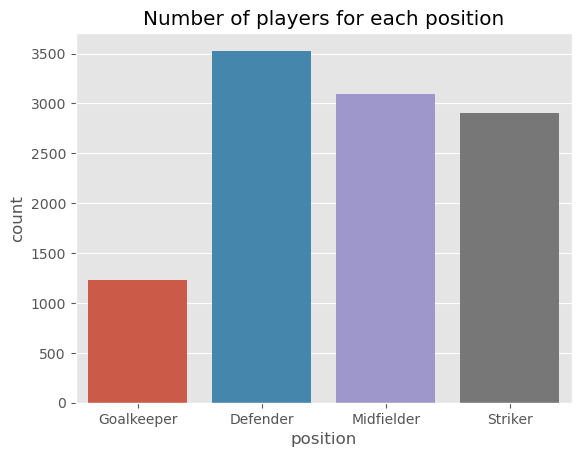

In [16]:
# Visualize the countplot in the 'position' column
sns.countplot(data=df1,x='position')

plt.rcParams['figure.figsize'] = (8,4)

plt.title('Number of players for each position')

plt.show()

# 6. Box Plot - EDA

<Axes: >

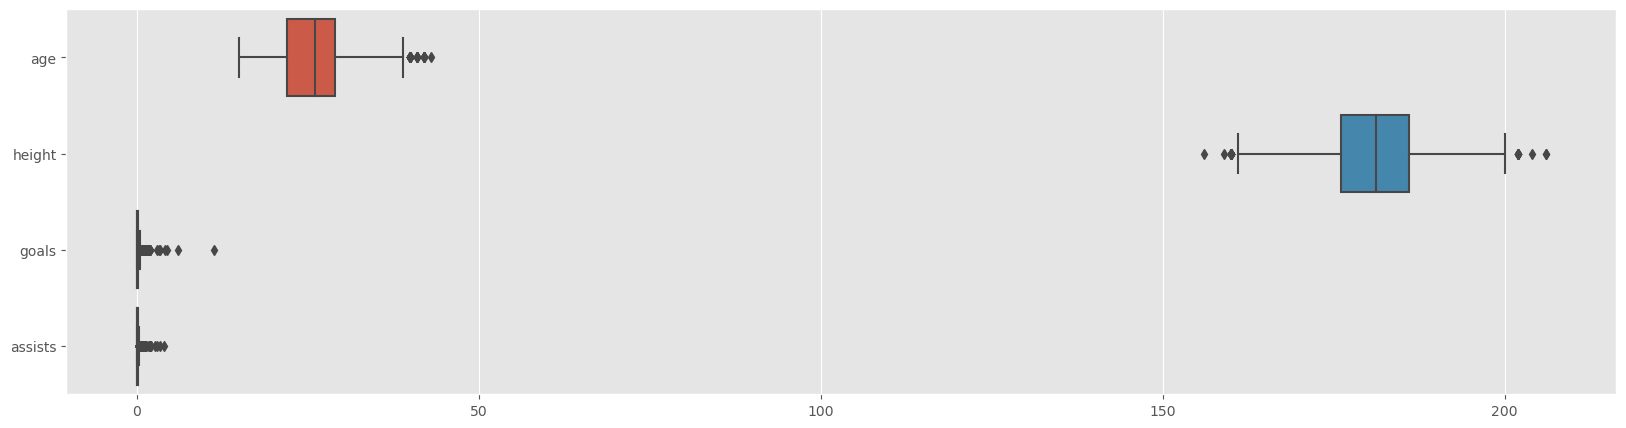

In [17]:
#Checking outliers in some columns using boxplot
cols = ['age', 'height', 'goals', 'assists']

plt.figure(figsize=(20,5))

sns.boxplot(data=df1[cols], orient='h')

<Axes: >

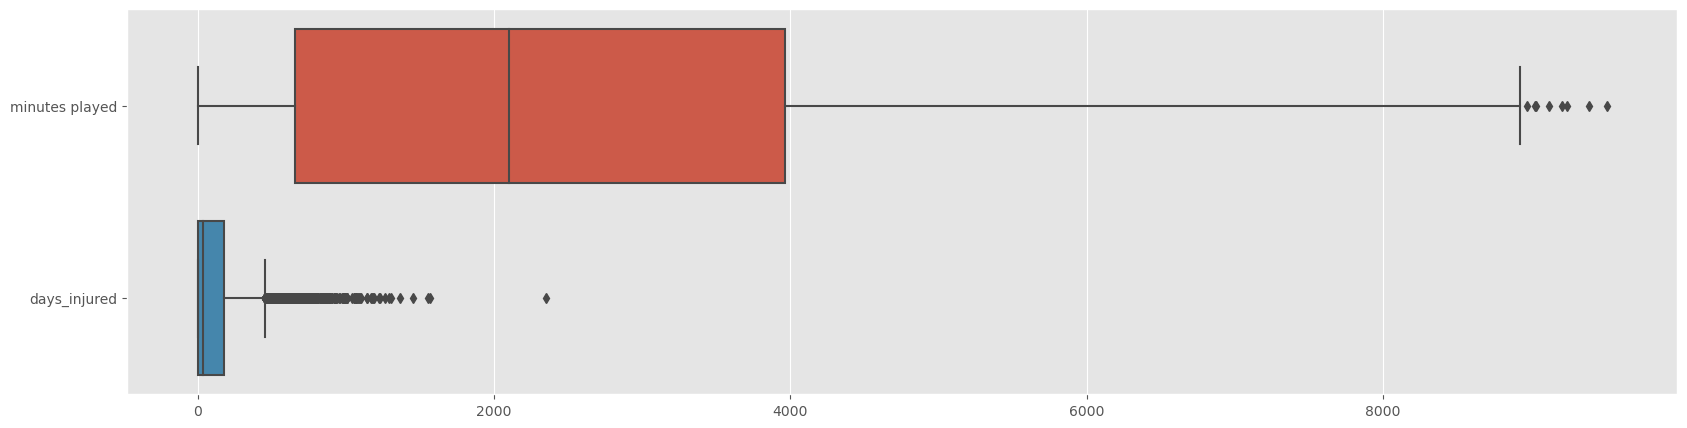

In [18]:
cols1 = ['minutes played', 'days_injured']

plt.figure(figsize=(20,5))

sns.boxplot(data=df1[cols1], orient='h')

# 7. Correlation Plot - EDA

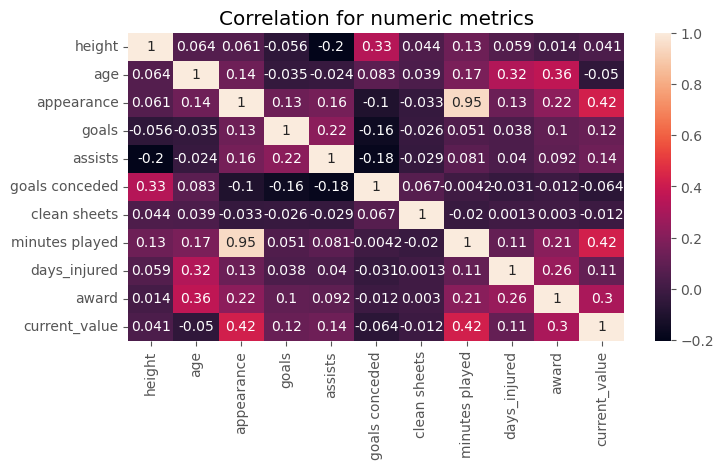

In [19]:
#Visualize Correlation matrix
correlation_matrix = df1.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation for numeric metrics')

plt.rcParams['figure.figsize'] = (12,6)

plt.show()

In [20]:
# In this chart, if we ignore some obvious points such as the high correlation between 'minutes played' and 'appearance',
# we can see other interesting points such as:
# 1. The high-value players tend to have more played minutes on the field 
# 2. The older players tend to have longer time of recovery after having injuries than young players

# 8. Regrression plot - EDA

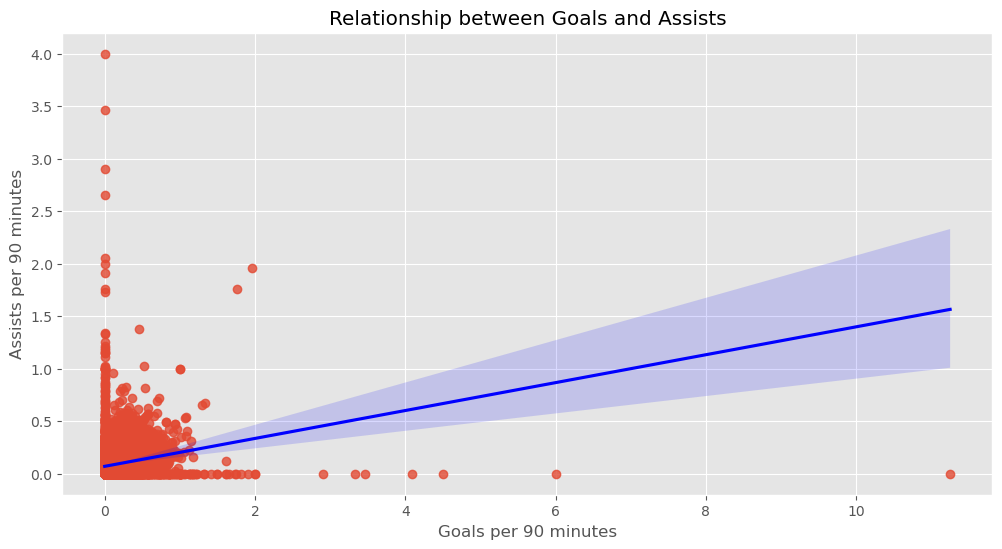

In [21]:
# Checking relationship between 'Goals per 90 mins' and 'Assists per 90 mins'
sns.regplot(data=df1, x='goals', y='assists', line_kws={'color':'blue'})

plt.title ('Relationship between Goals and Assists')

plt.xlabel('Goals per 90 minutes')

plt.ylabel('Assists per 90 minutes')

plt.show()

# 9. Distribution Plot - EDA

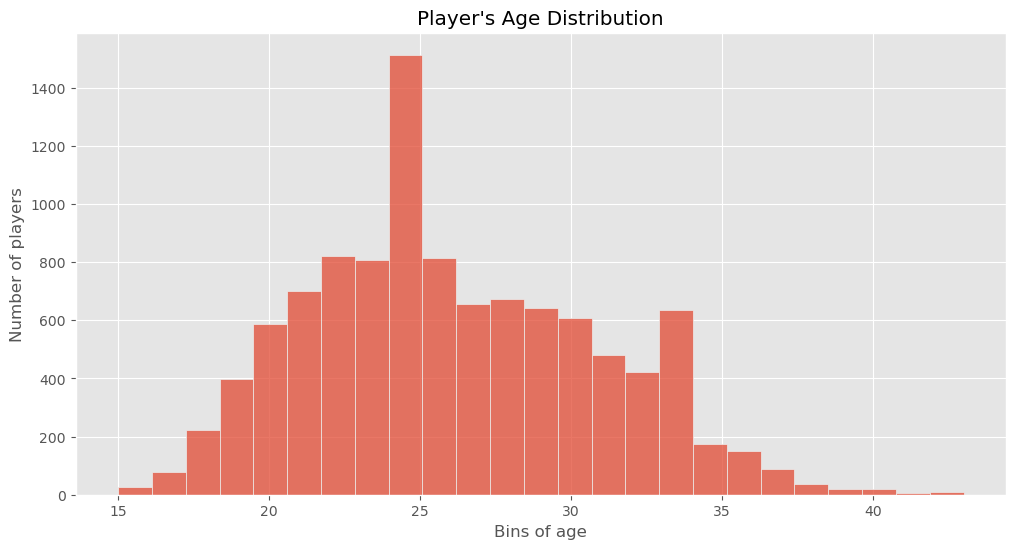

In [22]:
# Player's Age Distribution
df_age = df1.groupby('name')['age'].max().sort_values(ascending=False)

sns.histplot(data=df_age, bins=25)

plt.title("Player's Age Distribution")

plt.xlabel('Bins of age')

plt.ylabel('Number of players')

plt.rcParams['figure.figsize'] = (10,5)

plt.show()

In [23]:
# The chart above has showed that most professional football players in 11 football leagues all over the world are 24 
# years old.
# There are also a very small number of professional players over 40 years old and under 14 years old.

# Top 10 Football teams with squad's value from highest to smallest

In [24]:
df_top10 = df1.groupby('team')['current_value'].sum()

df_top10_sorted = df_top10.sort_values(ascending=False).head(10)

df_top10_sorted

team
Manchester City        1051250000
Chelsea FC             1015500000
Bayern Munich           979700000
Arsenal FC              890000000
Paris Saint-Germain     882550000
Liverpool FC            879000000
Real Madrid             870500000
FC Barcelona            799000000
Manchester United       795700000
Tottenham Hotspur       680300000
Name: current_value, dtype: int64

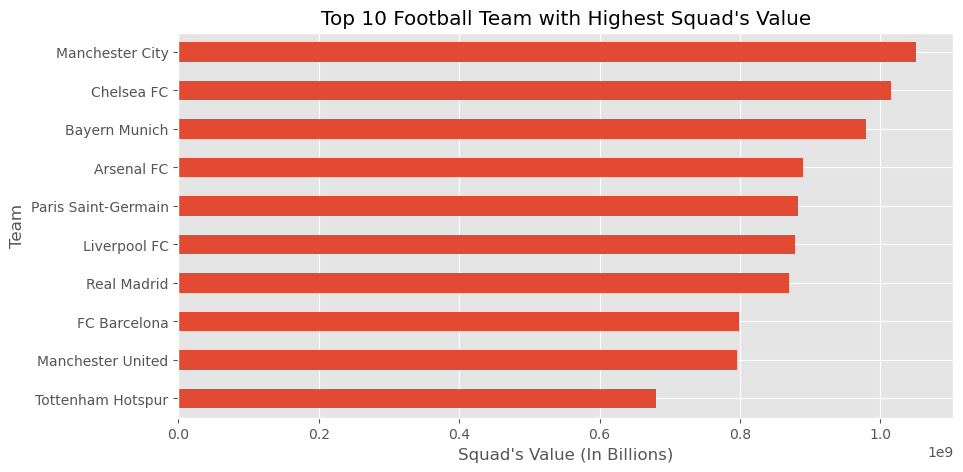

In [26]:
# Plot top 10 football team with highest squad's value
df_top10_sorted.sort_values().plot(kind='barh')

plt.title("Top 10 Football Team with Highest Squad's Value")

plt.xlabel("Squad's Value (In Billions)")

plt.ylabel("Team")

plt.show()

# Top 10 ST based on Appearance and Average Goals per 90 mins

In [27]:
df_ST = df1[df1['position'] == 'Striker']

df_top10_ST = df_ST[['team', 'position', 'name', 'appearance', 'goals']]

df_top10_ST_sorted = df_top10_ST.sort_values(by=['appearance','goals'], ascending=[False,False])

df_top10_ST_sorted.head(10)

,team,position,name,appearance,goals
1521,Real Madrid,Striker,Vinicius Junior,107,0.45
1576,AS Roma,Striker,Tammy Abraham,107,0.44
2049,Inter Milan,Striker,Lautaro Martínez,106,0.64
1523,Real Madrid,Striker,Rodrygo,106,0.40
50,West Ham United,Striker,Jarrod Bowen,105,0.33
399,Liverpool FC,Striker,Mohamed Salah,102,0.66
2051,Inter Milan,Striker,Edin Dzeko,101,0.45
48,West Ham United,Striker,Saïd Benrahma,100,0.35
4279,Sporting CP,Striker,Nuno Santos,100,0.28
4253,FC Porto,Striker,Mehdi Taremi,99,0.69


# Top 10 MF based on Appearance and Average Assists per 90 mins

In [28]:
df_MF = df1[df1['position'] == 'Midfielder']

df_top10_MF = df_MF[['team', 'position', 'name', 'appearance', 'assists']]

df_top10_MF_sorted = df_top10_MF.sort_values(by=['appearance','assists'], ascending=[False,False])

df_top10_MF_sorted.head(10)

,team,position,name,appearance,assists
22,Manchester United,Midfielder,Bruno Fernandes,105,0.29
448,Manchester City,Midfielder,Bernardo Silva,105,0.18
1517,Real Madrid,Midfielder,Eduardo Camavinga,105,0.07
46,West Ham United,Midfielder,Pablo Fornals,104,0.13
1562,AS Roma,Midfielder,Bryan Cristante,103,0.06
1516,Real Madrid,Midfielder,Federico Valverde,102,0.11
443,Manchester City,Midfielder,Rodri,102,0.10
5577,Wigan Athletic,Midfielder,Max Power,101,0.19
2671,AZ Alkmaar,Midfielder,Tijjani Reijnders,101,0.17
14,Manchester United,Midfielder,Casemiro,101,0.12


# Top 10 GK based on Appearance and Average Clean Sheets and Average Goals Conceded (per 90 mins)

In [29]:
df_GK = df1[df1['position'] == 'Goalkeeper']

df_top10_GK = df_GK[['team', 'position', 'name', 'appearance', 'clean sheets', 'goals conceded']]

df_top10_GK_sorted = df_top10_GK.sort_values(by=['appearance','clean sheets','goals conceded'], ascending=[False,False,True])

df_top10_GK_sorted.head(10)

,team,position,name,appearance,clean sheets,goals conceded
1550,AS Roma,Goalkeeper,Rui Patrício,105,0.40,1.00
0,Manchester United,Goalkeeper,David de Gea,104,0.34,1.22
4289,SL Benfica,Goalkeeper,Odysseas Vlachodimos,102,0.45,0.88
372,Liverpool FC,Goalkeeper,Alisson,101,0.43,0.99
1504,Real Madrid,Goalkeeper,Thibaut Courtois,101,0.38,0.93
1528,FC Barcelona,Goalkeeper,Marc-André ter Stegen,99,0.43,0.97
2187,OGC Nice,Goalkeeper,Kasper Schmeichel,99,0.23,1.26
431,Manchester City,Goalkeeper,Ederson,97,0.46,0.82
2110,AS Monaco,Goalkeeper,Alexander Nübel,97,0.24,1.29
883,Eintracht Frankfurt,Goalkeeper,Kevin Trapp,94,0.19,1.40


# Top 20 Football Players based on Market Value, Age and Award

In [30]:
df1_top20_highest_player_value = df1[['team', 'position', 'name', 'current_value', 'age', 'award']]

df1_top20_highest_player_value_sorted = df1_top20_highest_player_value.sort_values(by=['current_value','age','award'], ascending=[False,True,False])

df1_top20_highest_player_value_sorted.head(20)

,team,position,name,current_value,age,award
2654,Paris Saint-Germain,Striker,Kylian Mbappé,180000000,24,37
453,Manchester City,Striker,Erling Haaland,170000000,22,17
1521,Real Madrid,Striker,Vinicius Junior,150000000,22,12
960,Borussia Dortmund,Midfielder,Jude Bellingham,120000000,19,2
1017,Bayern Munich,Midfielder,Jamal Musiala,110000000,20,11
474,Arsenal FC,Striker,Bukayo Saka,110000000,21,2
450,Manchester City,Striker,Phil Foden,110000000,23,15
1540,FC Barcelona,Midfielder,Pedri,100000000,20,3
1523,Real Madrid,Striker,Rodrygo,100000000,22,8
1516,Real Madrid,Midfielder,Federico Valverde,100000000,24,10
